<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Statistics for Machine Learning Mini Project </h1>
     


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy import stats
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import random 
import statistics
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power

<h4 class="list-group-item list-group-item-action active" >1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. </h4>

In [3]:
df=pd.read_csv('fifa_stats.csv')
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [4]:
df.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [5]:
df.isnull().values.any()

True

In [6]:
missing_values = df.isnull().sum()
missing_values

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [7]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
Club,19,0.95,object
Name,0,0.00,object
Age,0,0.00,int64
Nationality,0,0.00,object
Overall_rating,0,0.00,int64
Potential,0,0.00,int64
Preferred Foot,0,0.00,object
International Reputation,0,0.00,int64
Weak Foot,0,0.00,int64
Skill Moves,0,0.00,int64


In [8]:
# drop the rows having missing values
df_drop = df.dropna()

# display the dataframe
df_drop.shape

(1981, 15)

In [9]:
df2 = df.copy()

In [10]:
df.Club.isnull().sum()

19

In [11]:
df.Club.value_counts()

Chelsea              24
Napoli               23
Manchester United    23
Liverpool            23
Borussia Dortmund    23
                     ..
Junior FC             1
Kawasaki Frontale     1
Kaizer Chiefs         1
Panathinaikos FC      1
Perth Glory           1
Name: Club, Length: 285, dtype: int64

In [12]:
df.Club.head(10)

0           FC Barcelona
1               Juventus
2    Paris Saint-Germain
3      Manchester United
4        Manchester City
5                Chelsea
6            Real Madrid
7           FC Barcelona
8            Real Madrid
9       AtlÃ©tico Madrid
Name: Club, dtype: object

In [13]:
# obtain the mode value
df.Club.mode()

0    Chelsea
dtype: object

In [14]:
# replace all the missing values with 'Chelsea'
df.Club.replace(np.NaN,"Chelsea" ,inplace = True)

In [15]:
df.Club.isnull().sum()

0

In [16]:
# replace "?" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Name.replace(to_replace = "?", value = np.NaN, inplace = True)

# replace " --" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Name.replace(to_replace = "  --", value = np.NaN, inplace = True)

# replace " -" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Name.replace(to_replace = "  -", value = np.NaN, inplace = True)

# replace "na" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Name.replace(to_replace = "na", value = np.NaN, inplace = True)

# replace "NAN" with NaN
# to_replace: value that will be replaced
# value: value to replace values matching `to_replace` with
df.Name.replace(to_replace = "NAN", value = np.NaN, inplace = True)

In [17]:
df.Name.isnull().sum()

0

>### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size


In [18]:
N=len(df)
n=200
# define a function to obtain the sample means for given population
# pass the population and and number of samples as the input parameters
def sample_mean_calculator(population_array, n_samples):
    
    # create an empty list to store the means of each sample
    sample_means = []
    for i in range(n_samples):
       
        # generates a random sample of size 500 from a given array or a list
        sample = np.random.choice(population_array, size=100, replace=False)
        
        # calculate the mean of the sample data
        sample_mean = np.mean(sample)
        
        # append the mean to the list
        sample_means.append(sample_mean)    
        
    return sample_means
xbar=sample_mean_calculator(df['Age'],N)
mu=np.mean(df['Age'])
sigma=np.std(df['Age'])
CTL=(np.mean(xbar)-mu)/sigma
se=sigma/np.sqrt(n)


In [19]:
print(se,np.mean(xbar))

0.2728086119425111 27.228415000000002


In [20]:
print(sigma,mu)

3.8580963894127795 27.2315


In [22]:
# From the above observations it can be seen that with an increase in sample size the population mean almost becomes equal to 
# sample mean hence CLT is almost =0 and the  curve almost follow the normal distribution

>### b)	Is there any evidence that the players overall rating is greater than 80?


In [28]:
df[df['Overall_rating']>80].head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


>### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.


In [39]:
nl = df[(df['Preferred Foot'] == 'Left')]['Potential']

n1 = len(nl)

n1_mean = np.mean(nl)

n1_std = np.std(nl)

nr = df[(df['Preferred Foot'] == 'Right')]['Potential']

n2 = len(nr)

n2_mean = np.mean(nr)

n2_std = np.std(nr)

In [42]:
# perform Shapiro-Wilk test
stat, p_value = shapiro(df['Potential'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9384800791740417
P-Value: 5.016414837142018e-28


In [41]:
# perform Levene's test
stat, p_value = stats.levene(nl, nr)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 1.8561933767199223
P-Value: 0.17321833707970302


In [ ]:
# The null and alternative hypothesis is:

# H0:  𝜇1−𝜇2≤0 
# H1:  𝜇1−𝜇2>0 

# Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value

In [43]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [44]:
z_score, pval = stests.ztest(x1 = nl, x2 = nr, value = 0, alternative = 'larger')
# print the test statistic and corresponding p-value
print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  1.5378037422592814
p-value:  0.06204830416024065


In [ ]:
# The above analysis shows that the test statistic value is in the 
# acceptance region, which implies we fail to reject (i.e. accept) H0 .

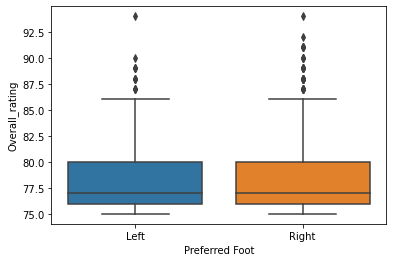

In [29]:
sns.boxplot(df['Preferred Foot'],df['Overall_rating']);

>### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].


In [ ]:
# The null and alternative hypothesis is:

# H0:  𝜇1−𝜇2=0 
# H1:  𝜇1−𝜇2≠0 
# Here ⍺ = 0.05, for a two-tailed test calculate the critical z-value.

In [45]:
z_val = np.abs(round(stats.norm.isf(q = 0.05/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 1.96


In [ ]:
def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, value, n1, n2):
    
    # calculate the test statistic
    denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
    zscore = ((samp_mean_1 - samp_mean_2) - (value)) / denominator
    
    # return the z-score
    return zscore

# given data
s1=df['Overall_rating'].mean
s2=df['Potential'].mean
std_1=np.std(df['Overall_rating'])
std_2=np.std(df['Potential'])
n1=len(df['Overall_rating'].isnotnull)
n2=len(df['Potential'])
null_val = 0

# pass the given data to the function 'TwoSampZTest'
zscore = TwoSampZTest(samp_mean_1 = s1, samp_mean_2 = s2, samp_std_1 = std_1, samp_std_2 = std_2, value = null_val, 
                      n1 = n1, n2 = n2)

print('z-score:', zscore)

In [ ]:
print('Confidence interval:', stats.norm.interval(0.95, loc = s1 - s2, 
                                                  scale = np.sqrt((std_1**2/n1) + (std_2**2/n2))))

>### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.


In [ ]:
# The null and alternative hypothesis is:

# H0: The variables skill and overall rating are independent
# H1: The variables skill and overall rating are not independent


In [94]:
table = pd.crosstab(df['Skill Moves'], df['Overall_rating'])

# observed values  
observed_value = table.values
observed_value

array([[ 38,  32,  23,  15,  19,  18,   5,  12,  13,   7,   2,   1,   1,
          3,   3,   1,   1,   0,   0],
       [ 96,  78,  63,  30,  24,  25,  13,  20,  10,  10,  12,   6,   3,
          2,   2,   1,   0,   0,   0],
       [219, 171, 138,  64,  72,  56,  28,  24,  17,  11,   9,   4,   7,
          2,   3,   1,   2,   0,   0],
       [ 74,  92,  75,  59,  52,  41,  43,  34,  27,  13,   8,   9,   1,
          7,   3,   2,   3,   0,   1],
       [  2,   0,   5,   0,   4,   3,   4,   4,   3,   4,   2,   2,   1,
          3,   0,   0,   0,   1,   1]], dtype=int64)

In [100]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 11.0705


In [101]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 264.3544361441865
p-value: 9.004103479489286e-24
Degrees of freedom: 72
Expected values: [[4.16130e+01 3.61810e+01 2.94880e+01 1.62960e+01 1.65870e+01 1.38710e+01
  9.02100e+00 9.11800e+00 6.79000e+00 4.36500e+00 3.20100e+00 2.13400e+00
  1.26100e+00 1.64900e+00 1.06700e+00 4.85000e-01 5.82000e-01 9.70000e-02
  1.94000e-01]
 [8.47275e+01 7.36675e+01 6.00400e+01 3.31800e+01 3.37725e+01 2.82425e+01
  1.83675e+01 1.85650e+01 1.38250e+01 8.88750e+00 6.51750e+00 4.34500e+00
  2.56750e+00 3.35750e+00 2.17250e+00 9.87500e-01 1.18500e+00 1.97500e-01
  3.95000e-01]
 [1.77606e+02 1.54422e+02 1.25856e+02 6.95520e+01 7.07940e+01 5.92020e+01
  3.85020e+01 3.89160e+01 2.89800e+01 1.86300e+01 1.36620e+01 9.10800e+00
  5.38200e+00 7.03800e+00 4.55400e+00 2.07000e+00 2.48400e+00 4.14000e-01
  8.28000e-01]
 [1.16688e+02 1.01456e+02 8.26880e+01 4.56960e+01 4.65120e+01 3.88960e+01
  2.52960e+01 2.55680e+01 1.90400e+01 1.22400e+01 8.97600e+00 5.98400e+00
  3.53600e+00 4.62400e+00 2.99200e+0

In [ ]:
# The above output shows that the chi-square test statistic is more than 11.0705 and 
# the p-value is less than 0.05, thus we reject the null hypothesis and 
# conclude that the variables Skill and Overall Ratings are not independent.

In [23]:
df.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154
